In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Reading Data Files

##### Beneficiary Data

In [3]:
beneficiary_df = pd.read_csv('data/Train_Beneficiarydata-1542865627584.csv')
inpatient_df = pd.read_csv('data/Train_Inpatientdata-1542865627584.csv')
outpatient_df = pd.read_csv('data/Train_Outpatientdata-1542865627584.csv')
labels_df = pd.read_csv('data/Train-1542865627584.csv')

In [4]:
beneficiary_data = pd.read_csv('data/Train_Beneficiarydata-1542865627584.csv')

In [5]:
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
# shape of the dataset
print(beneficiary_data.shape)

(138556, 25)


In [7]:
# check for missing values
beneficiary_data.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [8]:
# info of the dataset
beneficiary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [9]:
# describe the dataset
beneficiary_data.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


#### Inpatient Data

In [10]:
inpatient_data = pd.read_csv('data/Train_Inpatientdata-1542865627584.csv')

In [11]:
inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# shape of the dataset
print(inpatient_data.shape)

(40474, 30)


In [13]:
# check for missing values
inpatient_data.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [14]:
# check percentage of missing values onlly for columns with missing values
missing_values = inpatient_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / inpatient_data.shape[0] * 100
missing_values


AttendingPhysician       0.276721
OperatingPhysician      41.122696
OtherPhysician          88.412314
DeductibleAmtPaid        2.221179
ClmDiagnosisCode_2       0.558383
ClmDiagnosisCode_3       1.670208
ClmDiagnosisCode_4       3.790087
ClmDiagnosisCode_5       7.150269
ClmDiagnosisCode_6      11.953353
ClmDiagnosisCode_7      17.932500
ClmDiagnosisCode_8      24.563918
ClmDiagnosisCode_9      33.347334
ClmDiagnosisCode_10     90.297475
ClmProcedureCode_1      42.807728
ClmProcedureCode_2      86.524683
ClmProcedureCode_3      97.615753
ClmProcedureCode_4      99.713396
ClmProcedureCode_5      99.977764
ClmProcedureCode_6     100.000000
dtype: float64

In [15]:
# info of the dataset
inpatient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [16]:
# describe the dataset
inpatient_data.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


#### Outpatient data

In [17]:
outpatient_data = pd.read_csv('data/Train_Outpatientdata-1542865627584.csv')

In [18]:
outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [19]:
# shape of the dataset
print(outpatient_data.shape)

(517737, 27)


In [20]:
# check for missing values
outpatient_data.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [21]:
# check percentage of missing values for columns with missing values
missing_values = outpatient_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / outpatient_data.shape[0] * 100
missing_values

AttendingPhysician         0.269635
OperatingPhysician        82.497484
OtherPhysician            62.327205
ClmDiagnosisCode_1         2.018979
ClmDiagnosisCode_2        37.737307
ClmDiagnosisCode_3        60.741264
ClmDiagnosisCode_4        75.741351
ClmDiagnosisCode_5        85.640586
ClmDiagnosisCode_6        90.582864
ClmDiagnosisCode_7        93.633640
ClmDiagnosisCode_8        95.574587
ClmDiagnosisCode_9        97.134066
ClmDiagnosisCode_10       99.790820
ClmProcedureCode_1        99.968710
ClmProcedureCode_2        99.993047
ClmProcedureCode_3        99.999227
ClmProcedureCode_4        99.999614
ClmProcedureCode_5       100.000000
ClmProcedureCode_6       100.000000
ClmAdmitDiagnosisCode     79.637345
dtype: float64

In [22]:
# info of the dataset
outpatient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [23]:
# describe the dataset
outpatient_data.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


##### Data with Train Labels 

In [24]:
labels_data = pd.read_csv('data/Train-1542865627584.csv')

In [25]:
labels_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [26]:
# shape of the dataset
print(labels_data.shape)

(5410, 2)


## Data Preprocessing/Cleaning

### 1. Combining all the data into one dataframe

In [27]:
# 1. Combining all the data into one dataframe

# check common columns in inpatient, outpatient and beneficiary data
set(inpatient_data.columns) & set(outpatient_data.columns) & set(beneficiary_data.columns)

{'BeneID'}

In [28]:
# merge the inpatient, outpatient and beneficiary data using the common columns
merged_data = pd.merge(inpatient_data, outpatient_data, on=list(set(inpatient_data.columns) & set(outpatient_data.columns)), how='outer')

In [29]:
# check the shape of the merged data
print(merged_data.shape)

(558211, 30)


In [30]:
# merge the merged data with the beneficiary data
merged_data = pd.merge(merged_data, beneficiary_data, on='BeneID')

In [31]:
print(merged_data.shape)

(558211, 54)


In [32]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,2,2,1,1,5000,1068,250,320


In [33]:
# merge the merged data with the provider data
merged_data = pd.merge(merged_data, labels_data, on='Provider')

In [34]:
# check the shape of the merged data
print(merged_data.shape)

(558211, 55)


In [35]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes


In [36]:
# check for missing values
merged_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [37]:
# check percentage of missing values for columns with missing values
missing_values = merged_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / merged_data.shape[0] * 100
missing_values

AttendingPhysician         0.270149
OperatingPhysician        79.497538
OtherPhysician            64.218548
AdmissionDt               92.749337
ClmAdmitDiagnosisCode     73.863109
DeductibleAmtPaid          0.161050
DischargeDt               92.749337
DiagnosisGroupCode        92.749337
ClmDiagnosisCode_1         1.872589
ClmDiagnosisCode_2        35.041588
ClmDiagnosisCode_3        56.458221
ClmDiagnosisCode_4        70.524407
ClmDiagnosisCode_5        79.949517
ClmDiagnosisCode_6        84.881702
ClmDiagnosisCode_7        88.144805
ClmDiagnosisCode_8        90.425843
ClmDiagnosisCode_9        92.509105
ClmDiagnosisCode_10       99.102490
ClmProcedureCode_1        95.824160
ClmProcedureCode_2        99.016501
ClmProcedureCode_3        99.826410
ClmProcedureCode_4        99.978861
ClmProcedureCode_5        99.998388
ClmProcedureCode_6       100.000000
DOD                       99.259957
dtype: float64

In [38]:
# data types of the columns
merged_data.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

### 2. change the data types of the columns

In [39]:
# 2. change the data types of the columns

# Changing date columns to datetime
merged_data['ClaimStartDt'] = pd.to_datetime(merged_data['ClaimStartDt']) # claim start date
merged_data['ClaimEndDt'] = pd.to_datetime(merged_data['ClaimEndDt']) # claim end date

merged_data['DOB'] = pd.to_datetime(merged_data['DOB']) # date of birth
merged_data['DOD'] = pd.to_datetime(merged_data['DOD']) # date of death

merged_data['AdmissionDt'] = pd.to_datetime(merged_data['AdmissionDt']) # admission date
merged_data['DischargeDt'] = pd.to_datetime(merged_data['DischargeDt']) # discharge date


In [40]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes


In [41]:
merged_data.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


### 3. Label Encoding

In [42]:
# 3. Label Encoding

In [43]:
# check for categorical columns
merged_data.select_dtypes(include=['object']).columns

Index(['BeneID', 'ClaimID', 'Provider', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'RenalDiseaseIndicator',
       'PotentialFraud'],
      dtype='object')

In [44]:
# PotentialFraud
# check value counts of the target variable
merged_data['PotentialFraud'].value_counts()

PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

In [45]:
# change the target variable to 0 and 1
merged_data['PotentialFraud'] = merged_data['PotentialFraud'].map({'Yes': 1, 'No': 0})
merged_data['PotentialFraud'].value_counts()

PotentialFraud
0    345415
1    212796
Name: count, dtype: int64

In [46]:
# Gender column

# check value counts for Gender
merged_data['Gender'].value_counts()

Gender
2    323114
1    235097
Name: count, dtype: int64

### 4. make values in columns consistent

In [47]:
# 4. make values in columns consistent

In [48]:
# check RenalDiseaseIndicator column
merged_data['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    448363
Y    109848
Name: count, dtype: int64

Here we need to make the values more consistent: '0' with 0 and 'Y' with 1

In [49]:
# mnake values consistent in RenalDiseaseIndicator column
merged_data['RenalDiseaseIndicator'] = merged_data['RenalDiseaseIndicator'].map({'Y': 1, '0': 0})

In [50]:
# check again
merged_data['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    448363
1    109848
Name: count, dtype: int64

In [51]:
# check values in ChronicCond_Alzheimer
merged_data['ChronicCond_Alzheimer'].value_counts()

ChronicCond_Alzheimer
2    333884
1    224327
Name: count, dtype: int64

In [52]:
# check all columns with ChronicCond
chronic_columns = [col for col in merged_data.columns if 'ChronicCond' in col]
chronic_columns


['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

In [53]:
# check values in each of the chronic columns
for col in chronic_columns:
    print(merged_data[col].value_counts())
    print('\n')

ChronicCond_Alzheimer
2    333884
1    224327
Name: count, dtype: int64


ChronicCond_Heartfailure
1    329583
2    228628
Name: count, dtype: int64


ChronicCond_KidneyDisease
2    328227
1    229984
Name: count, dtype: int64


ChronicCond_Cancer
2    473706
1     84505
Name: count, dtype: int64


ChronicCond_ObstrPulmonary
2    383530
1    174681
Name: count, dtype: int64


ChronicCond_Depression
2    315497
1    242714
Name: count, dtype: int64


ChronicCond_Diabetes
1    393759
2    164452
Name: count, dtype: int64


ChronicCond_IschemicHeart
1    423830
2    134381
Name: count, dtype: int64


ChronicCond_Osteoporasis
2    380897
1    177314
Name: count, dtype: int64


ChronicCond_rheumatoidarthritis
2    384512
1    173699
Name: count, dtype: int64


ChronicCond_stroke
2    501430
1     56781
Name: count, dtype: int64




### 5. Structuring the data

In [54]:
# 5. Structuring the data

In [55]:
# since all the columns have values 1 and 2, it need to keep structure consistent as this is a binary column
# change the values of 2 to 0
for col in chronic_columns:
    merged_data[col] = merged_data[col].map({2: 0, 1: 1})


In [56]:
# check again
for col in chronic_columns:
    print(merged_data[col].value_counts())
    print('\n')

ChronicCond_Alzheimer
0    333884
1    224327
Name: count, dtype: int64


ChronicCond_Heartfailure
1    329583
0    228628
Name: count, dtype: int64


ChronicCond_KidneyDisease
0    328227
1    229984
Name: count, dtype: int64


ChronicCond_Cancer
0    473706
1     84505
Name: count, dtype: int64


ChronicCond_ObstrPulmonary
0    383530
1    174681
Name: count, dtype: int64


ChronicCond_Depression
0    315497
1    242714
Name: count, dtype: int64


ChronicCond_Diabetes
1    393759
0    164452
Name: count, dtype: int64


ChronicCond_IschemicHeart
1    423830
0    134381
Name: count, dtype: int64


ChronicCond_Osteoporasis
0    380897
1    177314
Name: count, dtype: int64


ChronicCond_rheumatoidarthritis
0    384512
1    173699
Name: count, dtype: int64


ChronicCond_stroke
0    501430
1     56781
Name: count, dtype: int64




In [57]:
# adding a flag isDead to indicate if the patient is dead or not
merged_data['isDead'] = np.where(merged_data['DOD'].isnull(), 0, 1)

# check the values
merged_data['isDead'].value_counts()

isDead
0    554080
1      4131
Name: count, dtype: int64

### 6. handling missing values

In [58]:
# 6. handling missing values

In [59]:
# print columns with missing values
missing_values

AttendingPhysician         0.270149
OperatingPhysician        79.497538
OtherPhysician            64.218548
AdmissionDt               92.749337
ClmAdmitDiagnosisCode     73.863109
DeductibleAmtPaid          0.161050
DischargeDt               92.749337
DiagnosisGroupCode        92.749337
ClmDiagnosisCode_1         1.872589
ClmDiagnosisCode_2        35.041588
ClmDiagnosisCode_3        56.458221
ClmDiagnosisCode_4        70.524407
ClmDiagnosisCode_5        79.949517
ClmDiagnosisCode_6        84.881702
ClmDiagnosisCode_7        88.144805
ClmDiagnosisCode_8        90.425843
ClmDiagnosisCode_9        92.509105
ClmDiagnosisCode_10       99.102490
ClmProcedureCode_1        95.824160
ClmProcedureCode_2        99.016501
ClmProcedureCode_3        99.826410
ClmProcedureCode_4        99.978861
ClmProcedureCode_5        99.998388
ClmProcedureCode_6       100.000000
DOD                       99.259957
dtype: float64

In [60]:
# DOD column
# check for missing values in DOD column
merged_data['DOD'].isnull().sum()

554080

In [61]:
# get the maximum date in the DOD column
max_date = merged_data['DOD'].max()
max_date

Timestamp('2009-12-01 00:00:00')

we can see that the last DOD value is 2009-12-01, so which means this Beneficiary data is of year 2009.
Therefor missing values of the DOD will be filled with this (to make additional features later)

In [62]:
# fill missing values in DOD column with the maximum date
merged_data['DOD'] = merged_data['DOD'].fillna(max_date)

In [63]:
# check again
merged_data['DOD'].isnull().sum()

0

### 7. Feature Engineering

In [64]:
# 7. Feature Engineering

# create new features

##### Age

In [65]:
# create a new feature "Age"
merged_data['Age'] = (merged_data['DOD'] - merged_data['DOB']).dt.days // 365

In [66]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,0,1,1,36000,3204,60,70,1,0,66
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,0,0,24000,2136,450,200,1,0,77
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,0,0,19000,1068,100,20,1,0,96
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,0,0,17000,1068,1050,540,1,0,87
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,0,27000,2136,450,160,1,0,79


##### AdmitPeriod

In [67]:
# create a new feature "AdmitPeriod"
merged_data['AdmitPeriod'] = (merged_data['DischargeDt'] - merged_data['AdmissionDt']).dt.days

In [68]:
# check for missing values
merged_data['AdmitPeriod'].isnull().sum()

517737

In [69]:
# check null in columns admitted and discharged date
merged_data['AdmissionDt'].isnull().sum(), merged_data['DischargeDt'].isnull().sum()

(517737, 517737)

In [70]:
# print 3 rows with missing values
merged_data[merged_data['AdmitPeriod'].isnull()].head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age,AdmitPeriod
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,0,24000,2136,450,200,1,0,77,NaN
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaT,...,0,0,17000,2136,3810,40,1,0,62,NaN
17,BENE46822,CLM294427,2009-04-09,2009-04-09,PRV55912,2000,PHY420794,PHY420794,NaN,NaT,...,0,1,8000,1068,4300,290,1,0,72,NaN


In [71]:
# fill missing values in AdmitPeriod with 0
merged_data['AdmitPeriod'] = merged_data['AdmitPeriod'].fillna(0)

In [72]:
# check again
merged_data['AdmitPeriod'].isnull().sum()

0

##### ClaimPeriod

In [73]:
# create a new feature "ClaimPeriod"
merged_data['ClaimPeriod'] = (merged_data['ClaimEndDt'] - merged_data['ClaimStartDt']).dt.days

In [74]:
# check for missing values
merged_data['ClaimPeriod'].isnull().sum()

0

##### Physician_Same

In [75]:
# check physicians columns
def check_physicians_same(record):
    '''
    Function to keep track of physicians. check if the attending, operating and other physicians are the same
    0: if all the physicians are the same
    1: if attending and operating physicians are the same but different from the other physician
    2: if attending and other physicians are the same but different from the operating physician
    3: if operating and other physicians are the same but different from the attending physician
    4: if all the physicians are different
    '''
    same_attending_and_operating = record['AttendingPhysician'] == record['OperatingPhysician']
    same_operating_and_other = record['OperatingPhysician'] == record['OtherPhysician']
    same_attending_and_other = record['AttendingPhysician'] == record['OtherPhysician']
    if same_attending_and_operating and same_operating_and_other:
        return 0
    elif same_attending_and_operating and not same_operating_and_other:
        return 1
    elif same_attending_and_other and not same_operating_and_other:
        return 2
    elif same_operating_and_other and not same_attending_and_operating:
        return 3
    else:
        return 4

In [76]:
merged_data['Physician_Same'] = merged_data.apply(check_physicians_same, axis=1)

In [77]:
# check the values
merged_data['Physician_Same'].value_counts()

Physician_Same
4    422257
2     72082
1     47988
0     13176
3      2708
Name: count, dtype: int64

In [78]:
# check for missing values
merged_data['Physician_Same'].isnull().sum()

0

In [79]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,36000,3204,60,70,1,0,66,6.0,6,4
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,24000,2136,450,200,1,0,77,0.0,0,4
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,19000,1068,100,20,1,0,96,12.0,12,4
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,17000,1068,1050,540,1,0,87,18.0,18,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,27000,2136,450,160,1,0,79,4.0,4,4


##### DiseasesCount

the total number of physicians who treated or attended

In [80]:
# create new column with diseases count
merged_data['DiseasesCount'] = merged_data[chronic_columns].sum(axis=1)

In [81]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,3204,60,70,1,0,66,6.0,6,4,7
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2136,450,200,1,0,77,0.0,0,4,4
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1068,100,20,1,0,96,12.0,12,4,5
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1068,1050,540,1,0,87,18.0,18,1,2
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,2136,450,160,1,0,79,4.0,4,4,6


In [82]:
# create new column with total number of physicians
merged_data['PhysiciansCount'] = merged_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].nunique(axis=1)

In [83]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,60,70,1,0,66,6.0,6,4,7,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,450,200,1,0,77,0.0,0,4,4,2
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,100,20,1,0,96,12.0,12,4,5,3
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1050,540,1,0,87,18.0,18,1,2,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,450,160,1,0,79,4.0,4,4,6,3


In [84]:
# print some physician columns
merged_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'PhysiciansCount']].head()

,AttendingPhysician,OperatingPhysician,OtherPhysician,PhysiciansCount
0,PHY390922,NaN,NaN,1
1,PHY365867,PHY327147,NaN,2
2,PHY349293,PHY370861,PHY363291,3
3,PHY334706,PHY334706,NaN,1
4,PHY390614,PHY323689,PHY363291,3


##### TotalClaimCodes

indicates the total number of claim diagnosis codes used in the medical bill made by the provider

In [85]:
# create column with total number of claims diagnosis codes
claim_columns = [col for col in merged_data.columns if 'ClmDiagnosisCode' in col]
merged_data['TotalClaimCodes'] = merged_data[claim_columns].nunique(axis=1)

In [86]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,70,1,0,66,6.0,6,4,7,1,9
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,200,1,0,77,0.0,0,4,4,2,9
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,20,1,0,96,12.0,12,4,5,3,9
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,540,1,0,87,18.0,18,1,2,1,9
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,160,1,0,79,4.0,4,4,6,3,7


##### TotalClaimPrecedures

indicates the total no. of medical procedures used on a beneficiary which gives an estimate cost incurred by beneficiary

In [87]:
# create column with total number of claims procedure codes
claim_proc_columns = [col for col in merged_data.columns if 'ClmProcedureCode' in col]
merged_data['TotalClaimProcedures'] = merged_data[claim_proc_columns].nunique(axis=1)

In [88]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,66,6.0,6,4,7,1,9,0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,1,0,77,0.0,0,4,4,2,9,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,96,12.0,12,4,5,3,9,2
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,0,87,18.0,18,1,2,1,9,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,0,79,4.0,4,4,6,3,7,1


### 8. Data Validation

In [89]:
# 8. Data Validation

In [90]:
# check age value range
merged_data['Age'].describe()

count    558211.000000
mean         73.274758
std          13.011533
min          26.000000
25%          68.000000
50%          74.000000
75%          82.000000
max         100.000000
Name: Age, dtype: float64

In [91]:
# validate age
merged_data[merged_data['Age'] < 0]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures


In [92]:
# check for negative values in AdmitPeriod
merged_data[merged_data['AdmitPeriod'] < 0]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures


In [93]:
# check for negative values in deductible amount
merged_data[merged_data['DeductibleAmtPaid'] < 0]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures


##### Handle Missing values in DeductibleAmtPaid

In [94]:
# replacing null values with 0 in DeductibleAmtPaid
merged_data['DeductibleAmtPaid'] = merged_data['DeductibleAmtPaid'].fillna(0)

In [97]:
# merged_data.to_csv('processed/merged_data.csv', index=False)

# EDA

In [95]:
df = merged_data.copy()

In [96]:
df.shape

(558211, 64)

### Descriptive Analysis

In [98]:
# Descriptive Analysis (withouth the ID columns & Date columns)
df.drop(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD'], axis=1).describe()



,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures
count,558211.000000,558211.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.294788,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.578838,1.255011,...,0.381211,0.007400,73.274758,0.410762,1.727940,3.384570,4.498616,1.292981,3.008382,0.053557
std,3821.534891,273.814128,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.717437,...,0.485685,0.085707,13.011533,2.112693,4.904984,1.137538,2.332301,0.505266,2.446685,0.280534
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,68.000000,0.000000,0.000000,4.000000,3.000000,1.000000,1.000000,0.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,...,0.000000,0.000000,74.000000,0.000000,0.000000,4.000000,5.000000,1.000000,2.000000,0.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,2.000000,1.000000,...,1.000000,0.000000,82.000000,0.000000,0.000000,4.000000,6.000000,2.000000,4.000000,0.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,...,1.000000,1.000000,100.000000,35.000000,36.000000,4.000000,11.000000,3.000000,10.000000,5.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 64 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

### Numerical Data Distribution

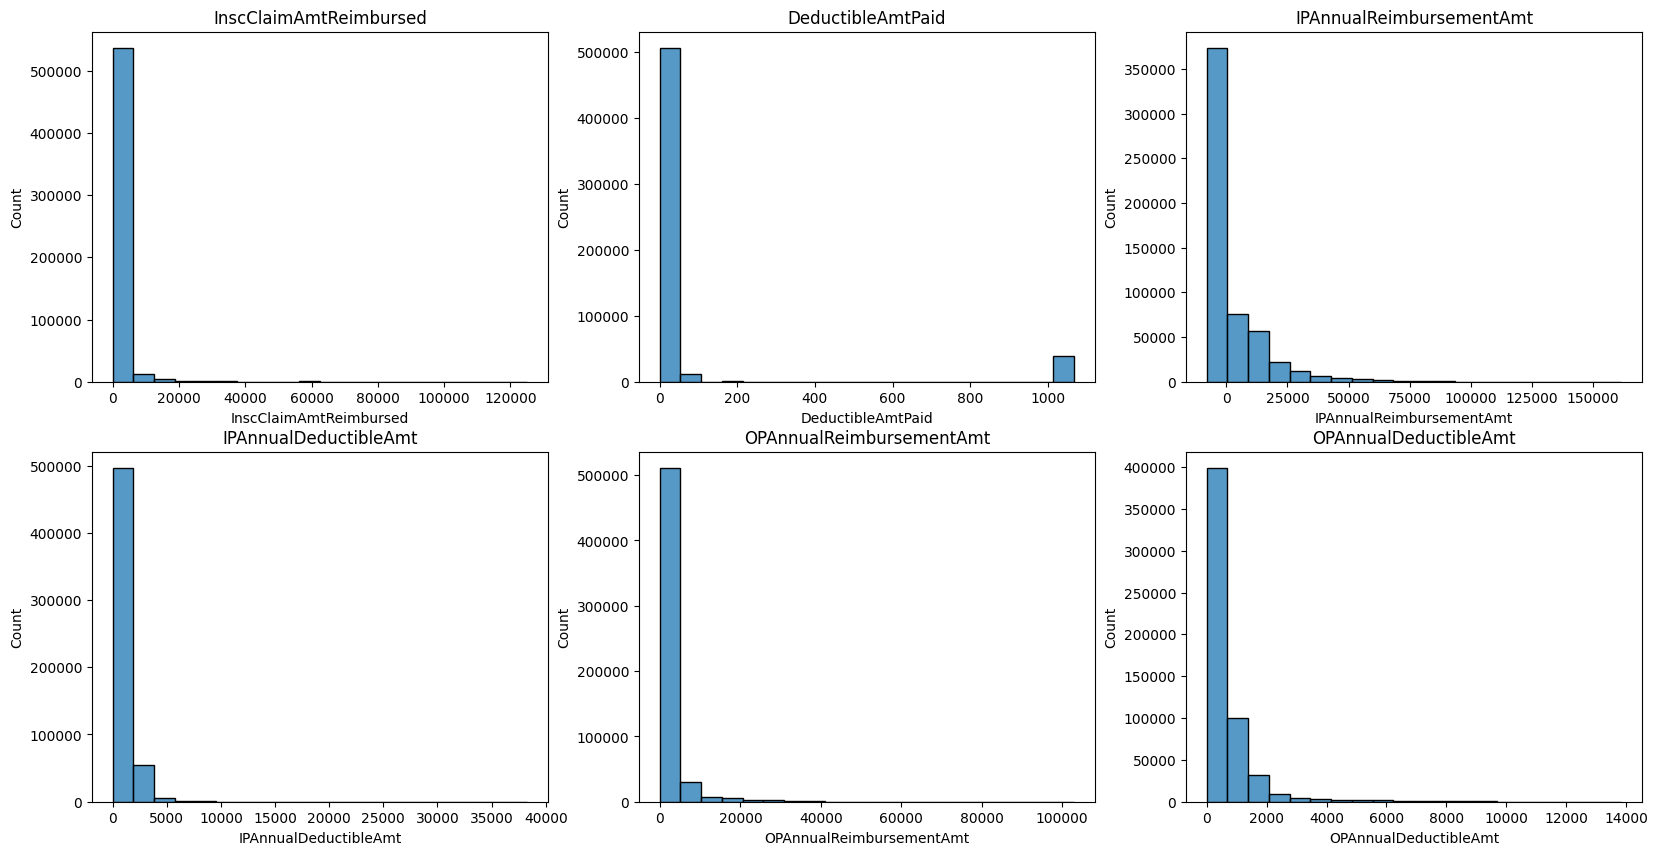

In [118]:
# Numerical Data Distribution

# select only correct numerical columns
numerical_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
                     'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

# plot numerical data distribution
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=20)
    plt.title(col)


In [ ]:
# # plot
# fig, axes = plt.subplots(4, 4, figsize=(20, 20))
# axes = [ax for axes_row in axes for ax in axes_row]

# for i, col in enumerate(numerical_columns[:16]):
#     sns.histplot(df[col], kde=True, ax=axes[i])

### Categorical Data Distribution

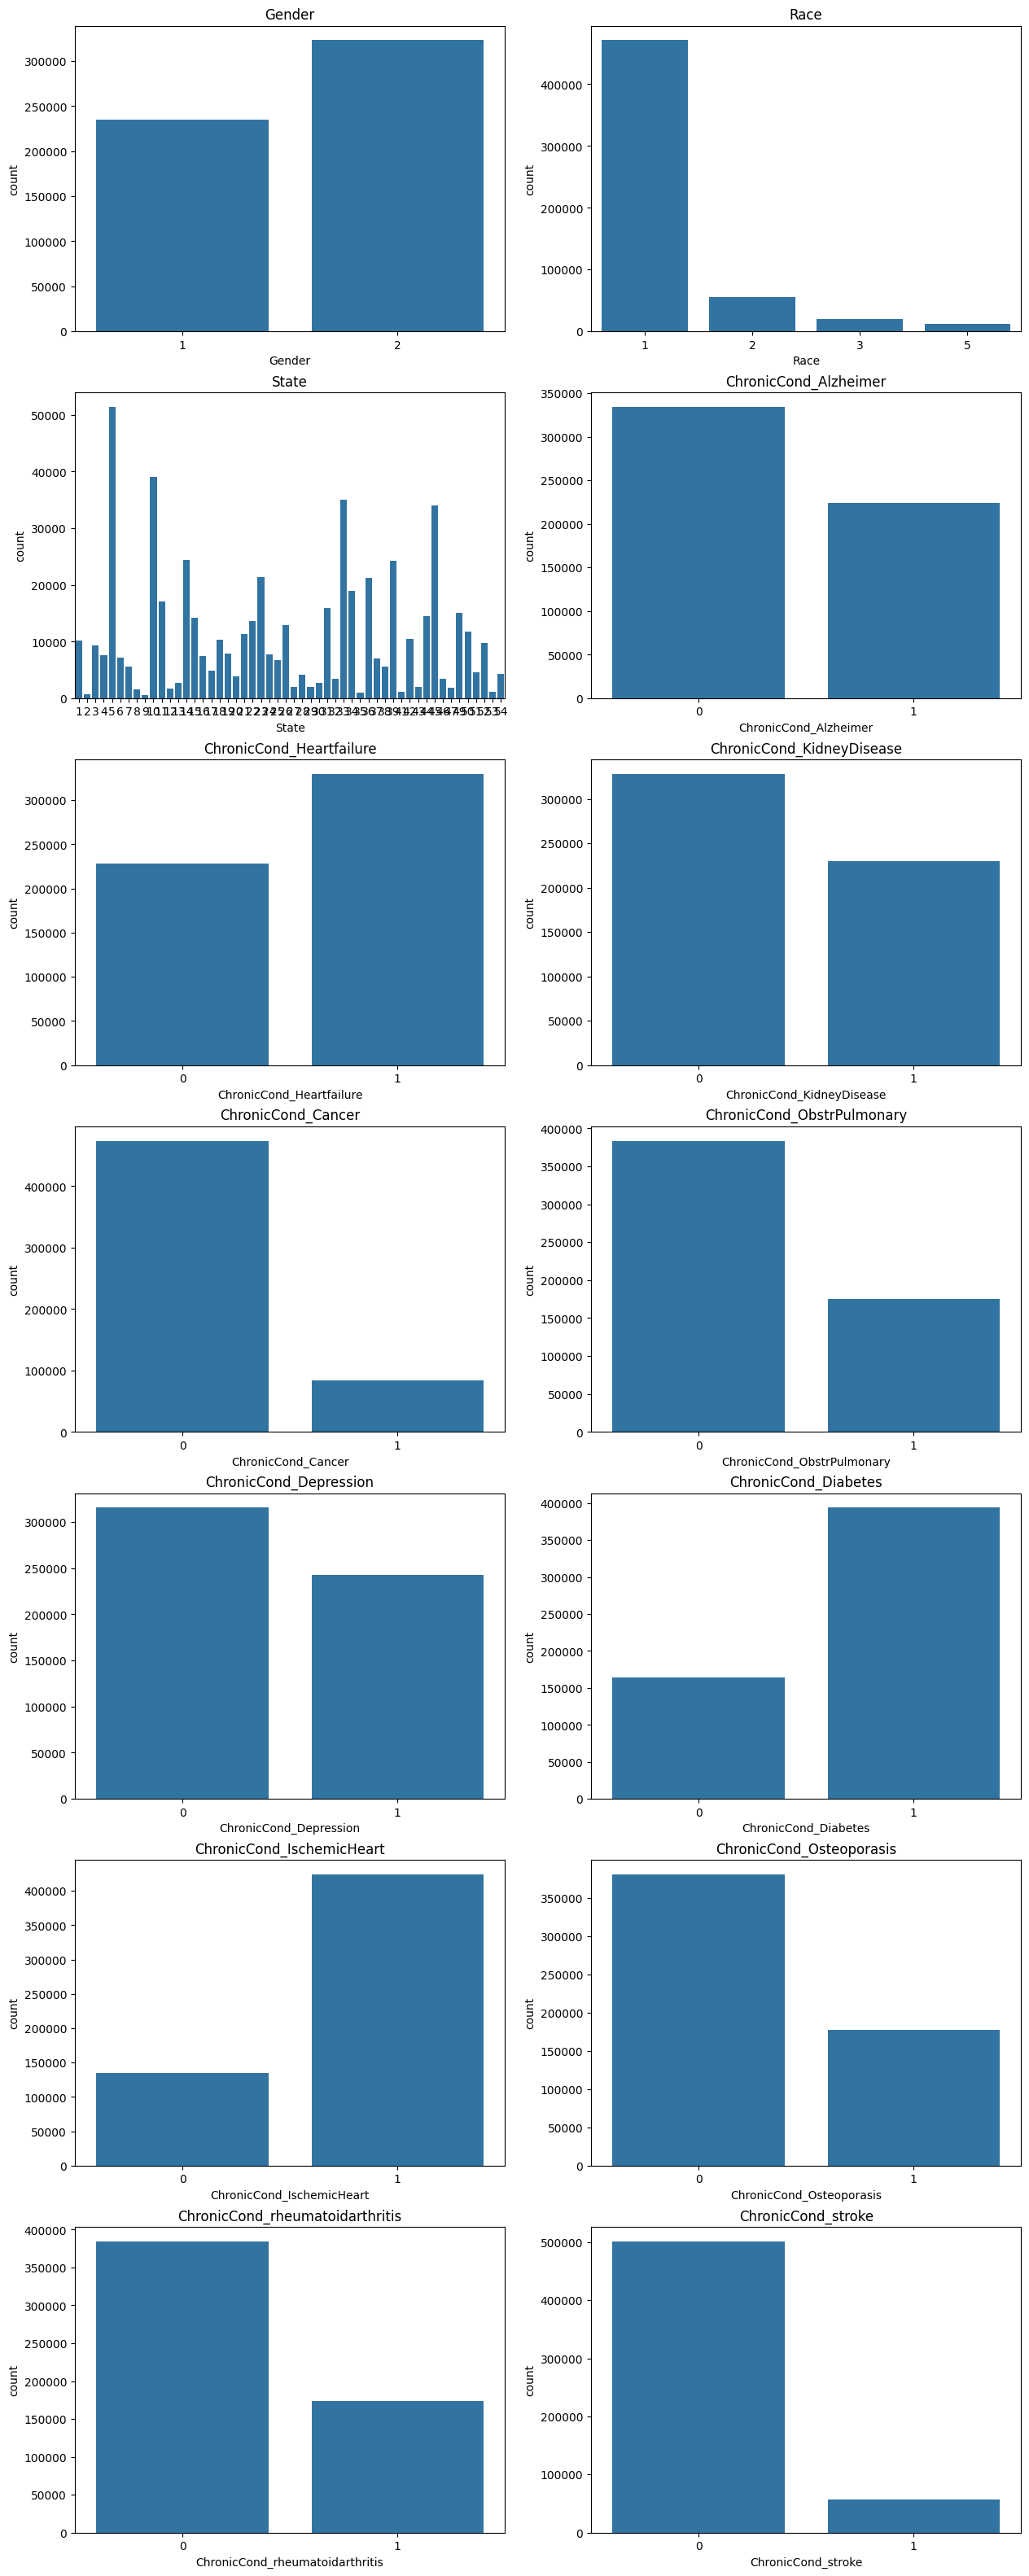

In [111]:
# Categorical Data Distribution

# get categorical columns
categorical_columns = ['Gender', 'Race', 'State',
                       'ChronicCond_Alzheimer',
                        'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                        'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
                        'ChronicCond_Depression', 'ChronicCond_Diabetes',
                        'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                        'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'County',
                       'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1','ClmProcedureCode_2', 'ClmProcedureCode_3', 
                        'ClmProcedureCode_4','ClmProcedureCode_5',
                        'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                        'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                        'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                        'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10'
                        ]

# plot categorical data distribution
fig, axes_cat = plt.subplots(7, 2, figsize=(15, 40))
axes_cat = [ax for axes_row in axes_cat for ax in axes_row]

for i, col in enumerate(categorical_columns[:14]):
    sns.countplot(x=col, data=df, ax=axes_cat[i])
    axes_cat[i].set_title(f'{col}')

plt.show()

### Target variable

Text(0.5, 1.0, 'Potential Fraud Count')

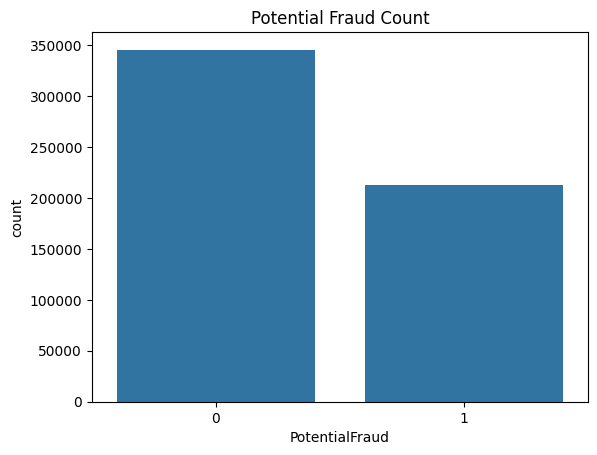

In [112]:
# target variable
sns.countplot(x='PotentialFraud', data=df)
plt.title('Potential Fraud Count')

### Feature Engineering

In [119]:
# Feature Engineering

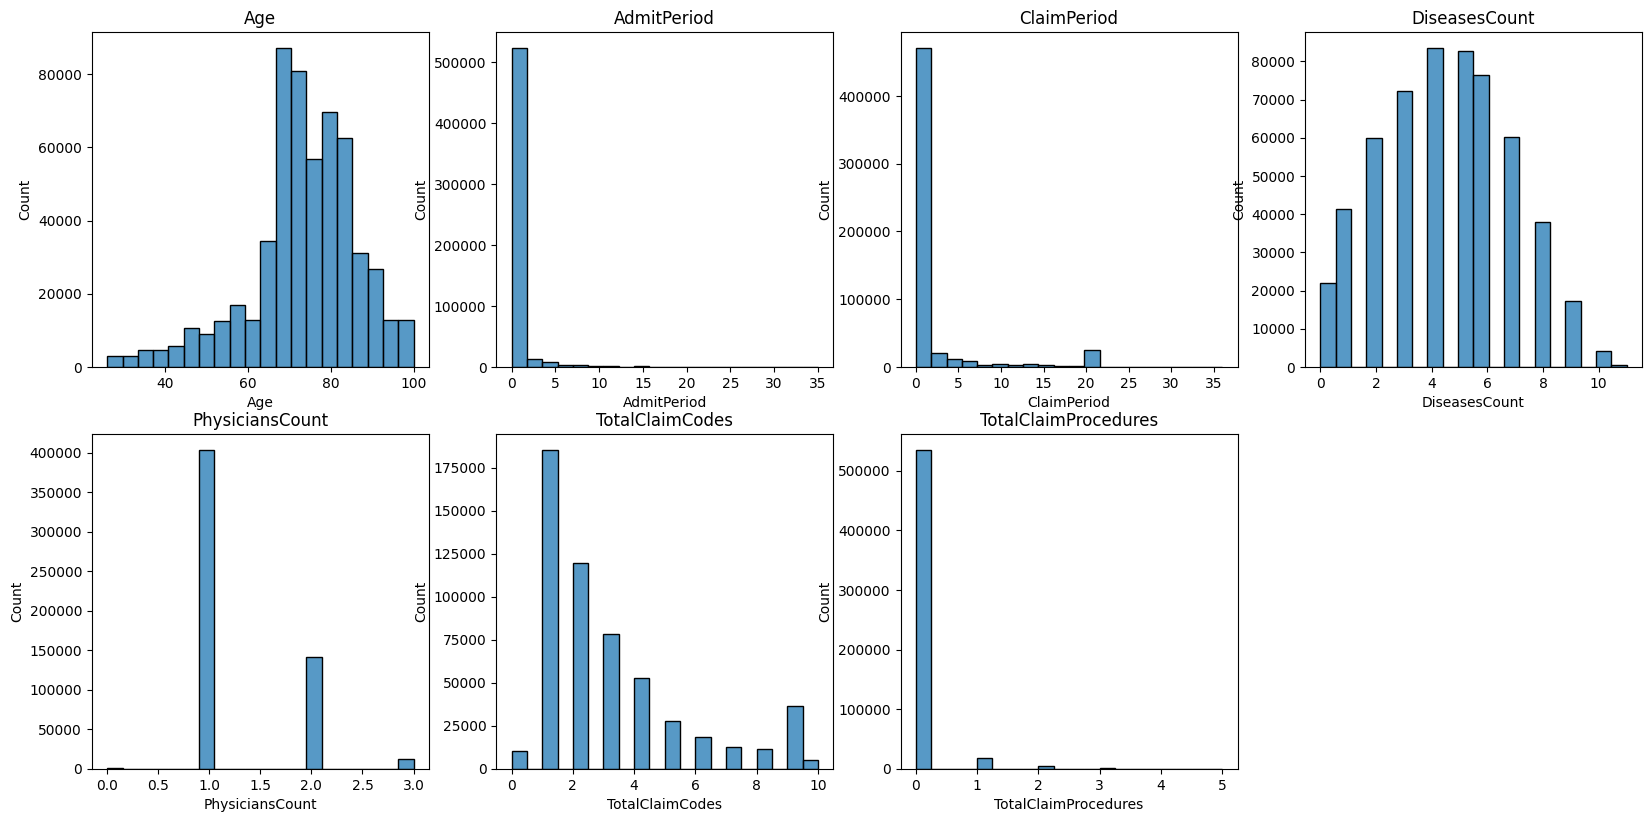

In [113]:
num_new_feat = ['Age', 'AdmitPeriod', 'ClaimPeriod', 'DiseasesCount', 
                     'PhysiciansCount', 'TotalClaimCodes', 'TotalClaimProcedures']

# plot numerical data distribution
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_new_feat):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], bins=20)
    plt.title(col)

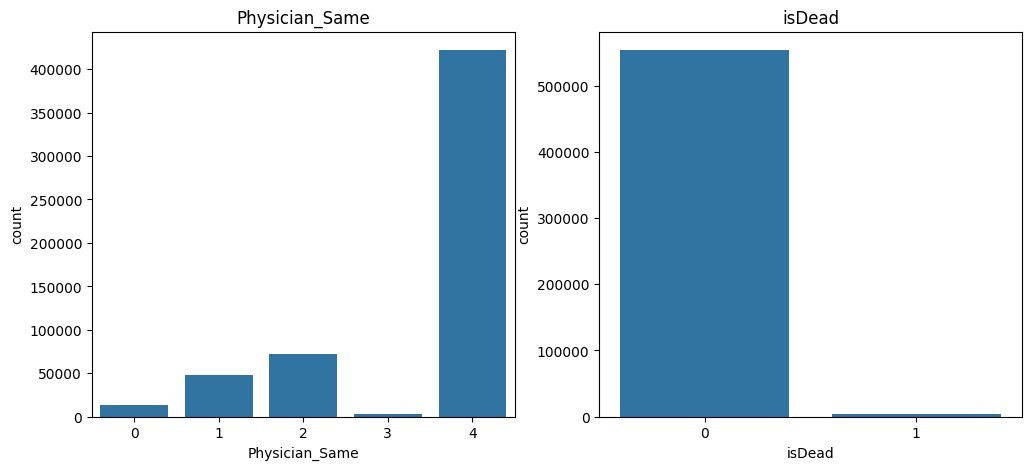

In [135]:
cat_new_feat = ['Physician_Same', 'isDead']

fig, axes_cat = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(cat_new_feat):
    sns.countplot(x=col, data=df, ax=axes_cat[i])
    axes_cat[i].set_title(f'{col}')

plt.show()

# Multivariate analysis

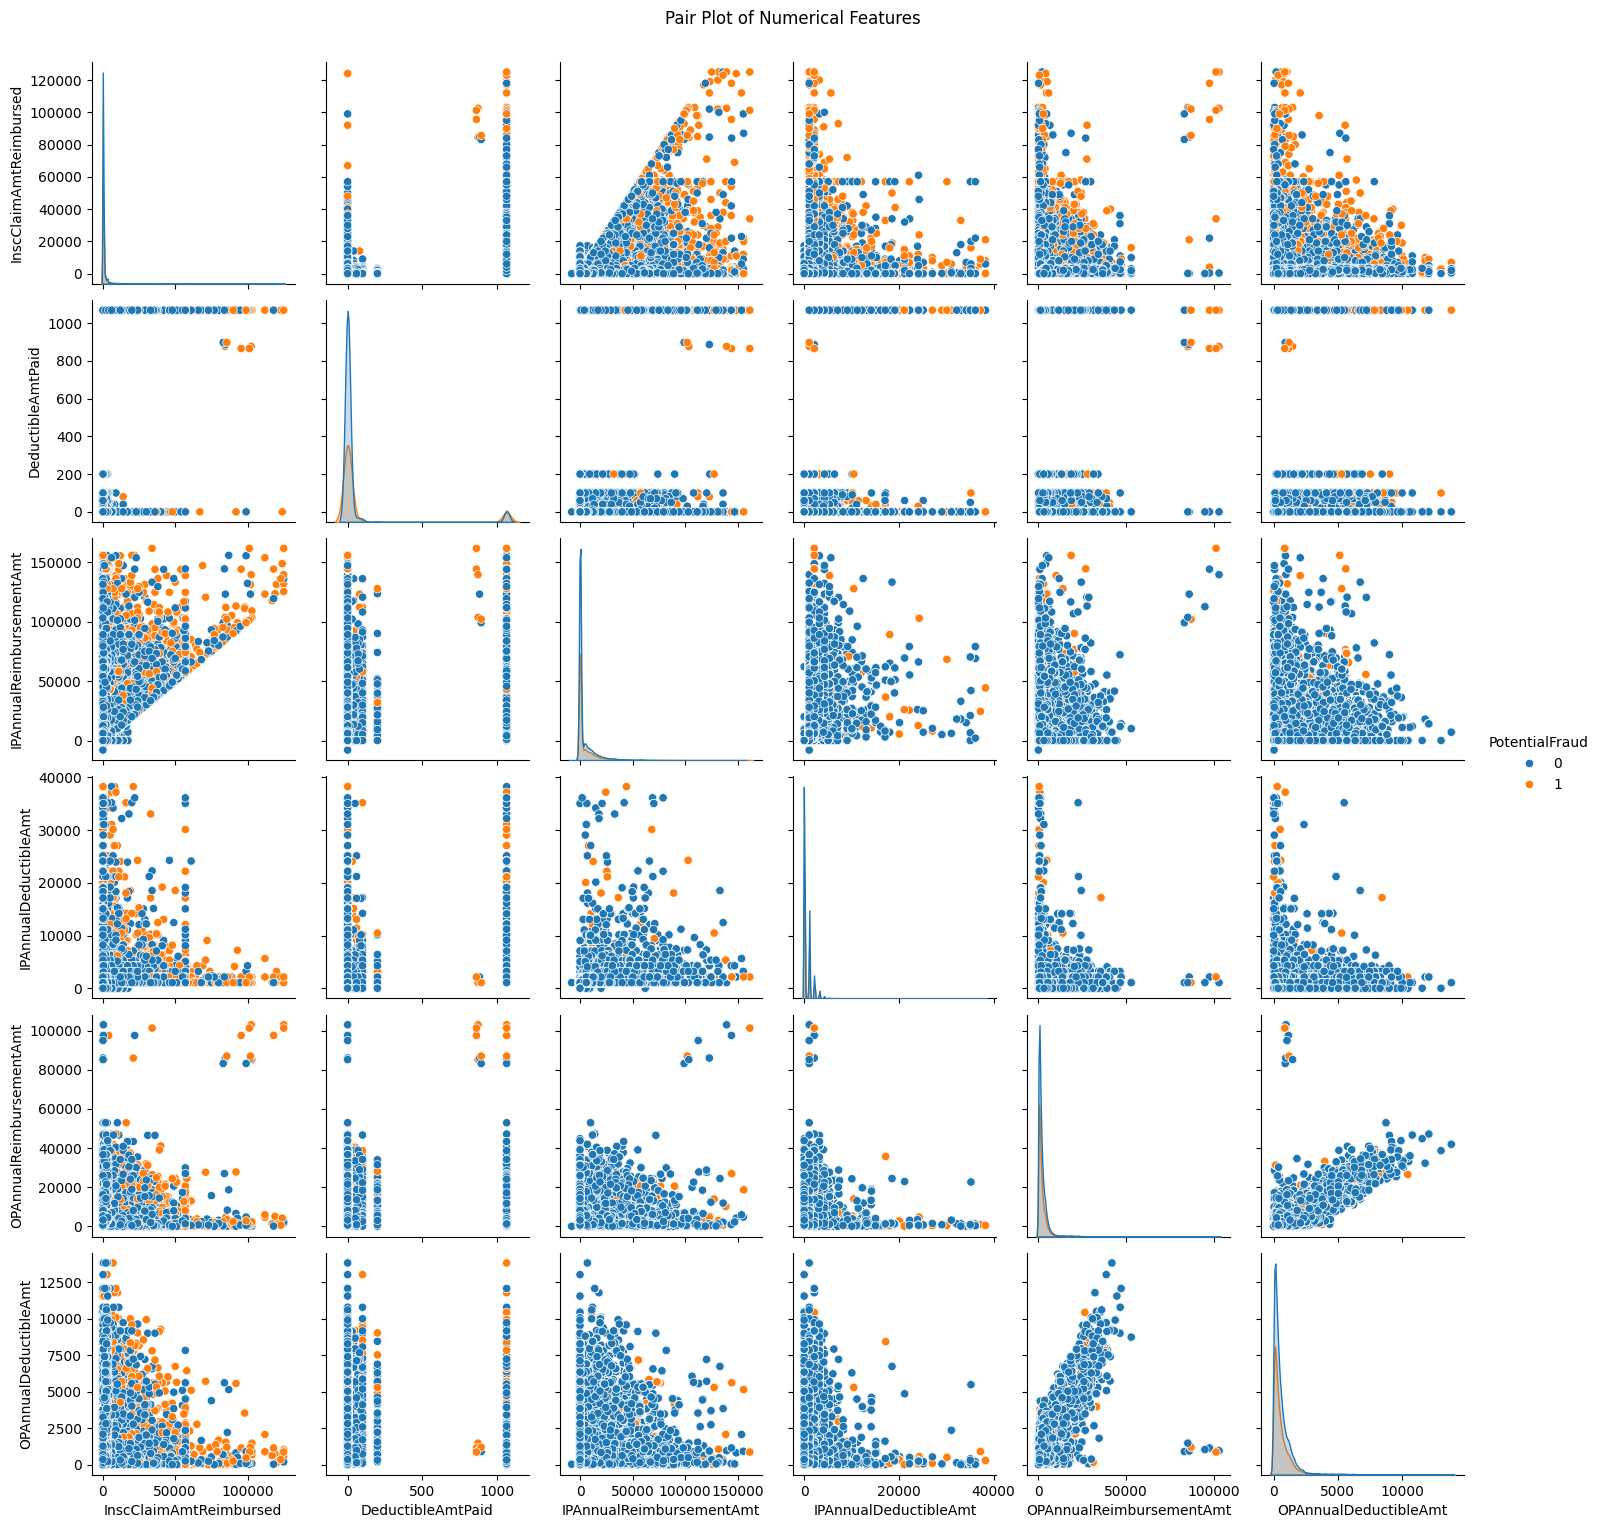

In [139]:
# pairplot
sns.pairplot(df, vars=numerical_columns, hue='PotentialFraud', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()



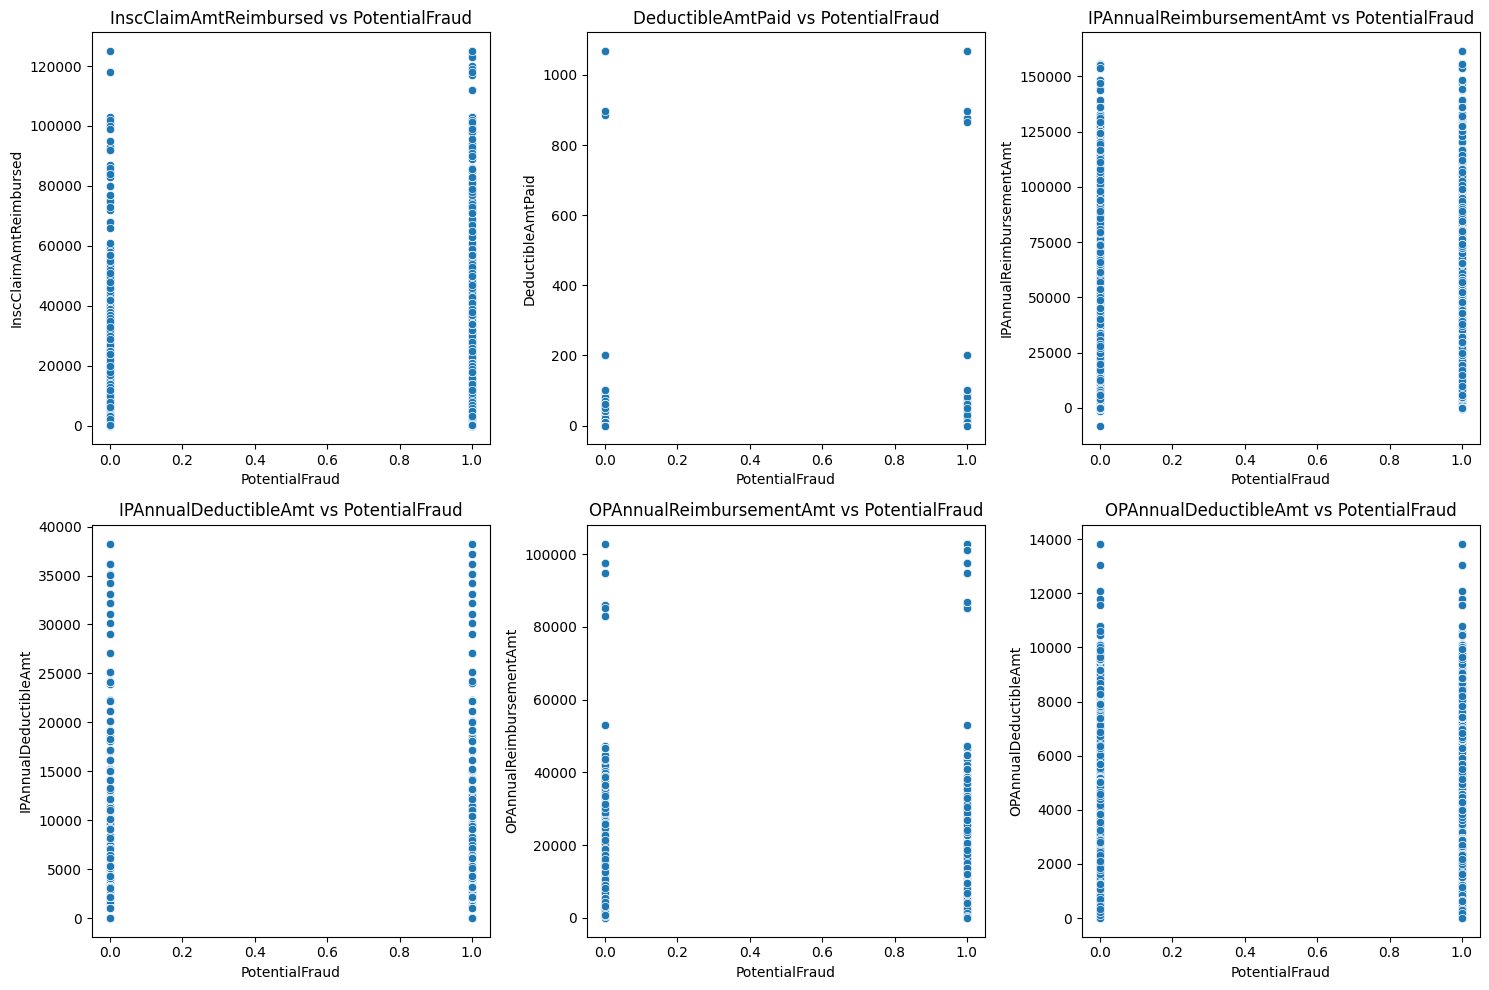

In [138]:
# bi-variate visualizations to understand the relationship between the features and the target variable

# numerical features vs target variable
# Scatter plots for numerical features vs. target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x='PotentialFraud', y=col, data=df)
    plt.title(f'{col} vs PotentialFraud')

plt.tight_layout()
plt.show()

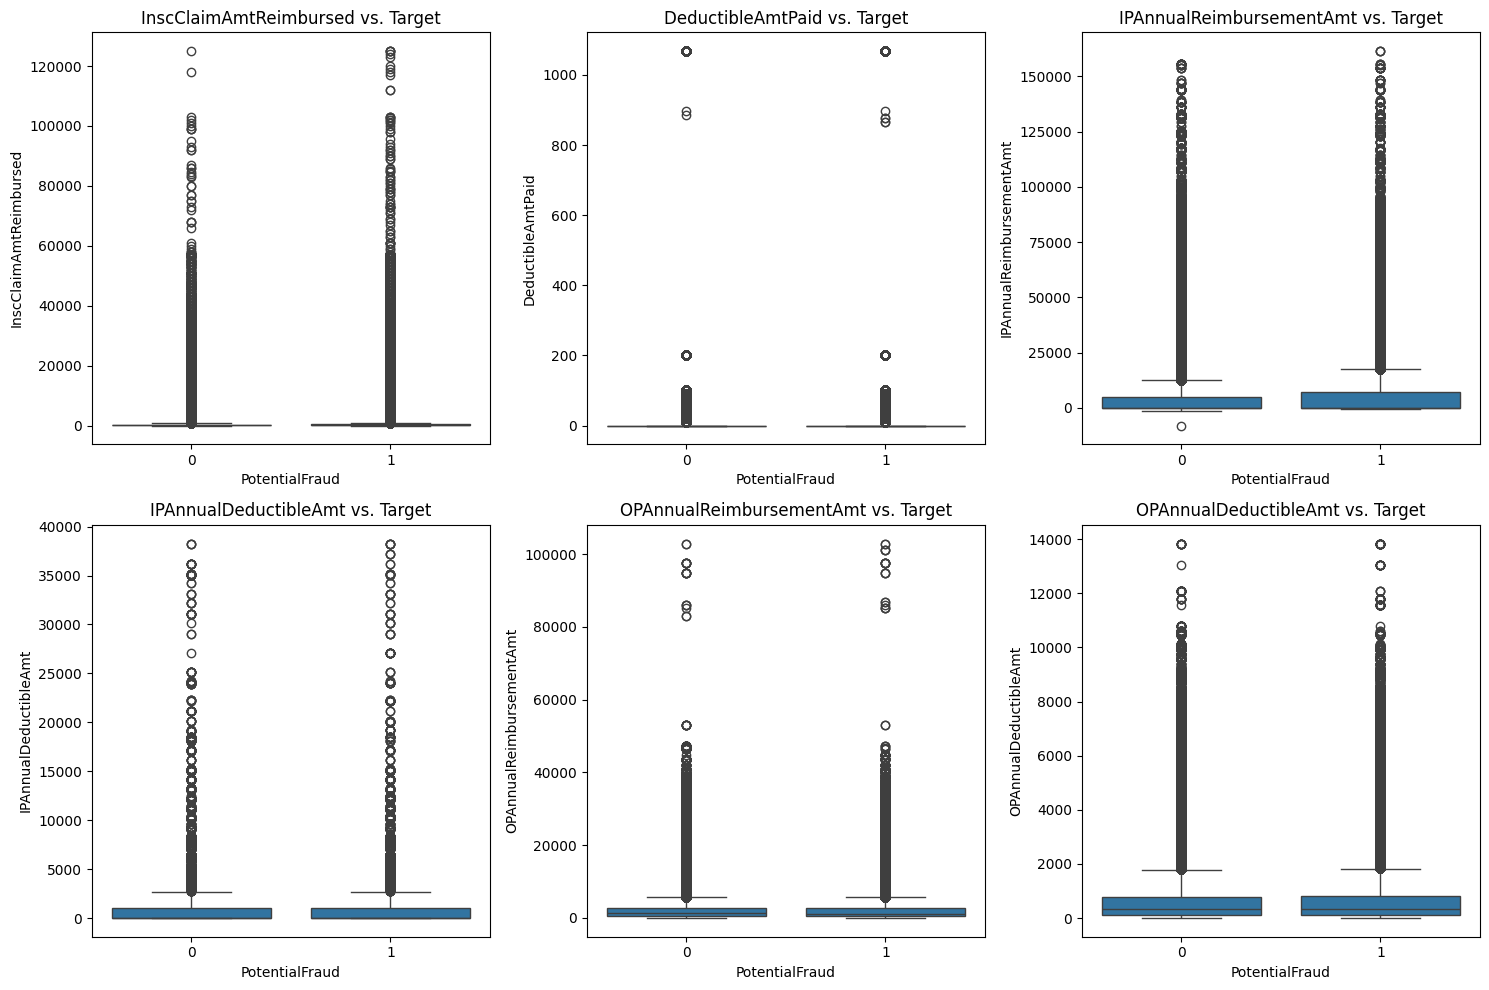

In [141]:
# Box plots for numerical features vs. target variable
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='PotentialFraud', y=col, data=df)
    plt.title(f'{col} vs. Target')

plt.tight_layout()
plt.show()

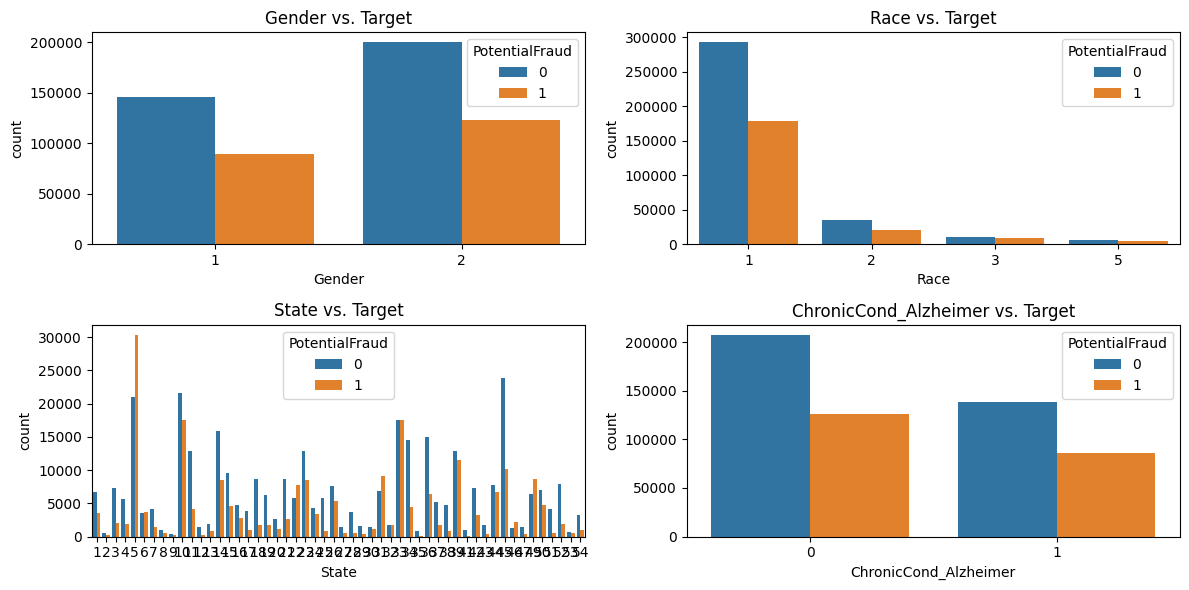

In [144]:
# Relationship between categorical features and the target variable
fig, axes_cat = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(categorical_columns[:4]): 
    row_index = i // 2
    col_index = i % 2
    sns.countplot(x=col, hue='PotentialFraud', data=df, ax=axes_cat[row_index, col_index])
    axes_cat[row_index, col_index].set_title(f'{col} vs. Target')

plt.tight_layout()
plt.show()


### Visualizations for Insights

<Figure size 1000x500 with 0 Axes>

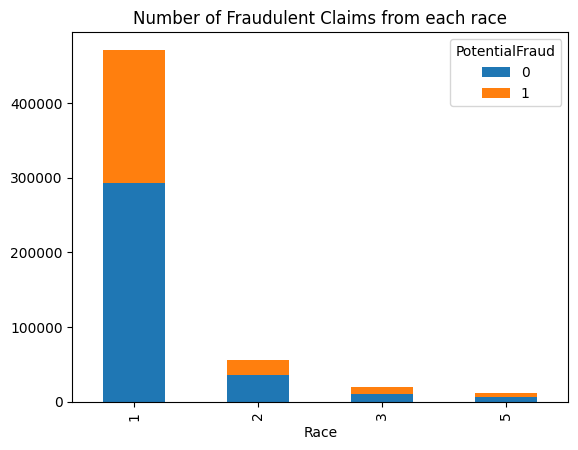

In [147]:
# number of fraudulent claims from each race
plt.figure(figsize=(10, 5))
res = df.groupby(['Race','PotentialFraud']).ClaimID.count()
res.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Fraudulent Claims from each race')
plt.show()


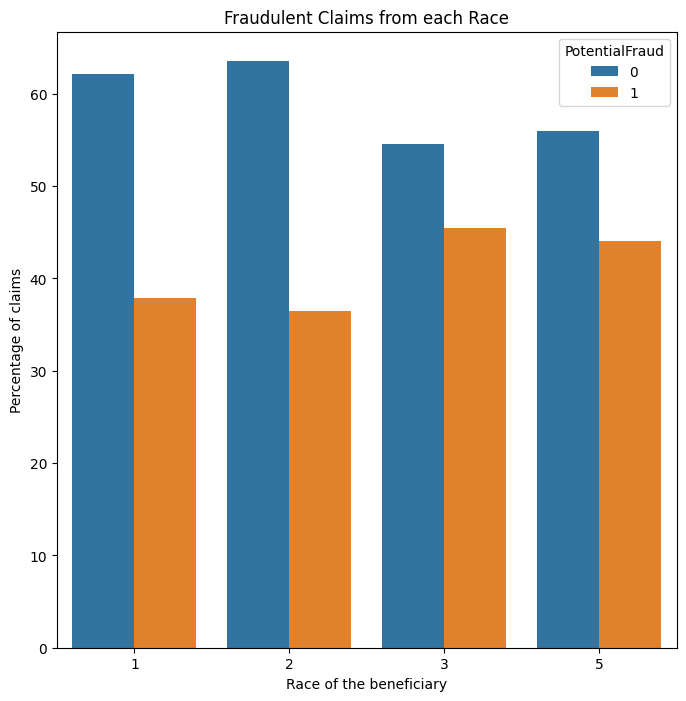

In [152]:
# as a percentage
res = df.groupby(['Race', 'PotentialFraud']).ClaimID.count().reset_index()
res['Proportion'] = res.groupby('Race')['ClaimID'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(8, 8))
ax = sns.barplot(x='Race', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Race')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()


Almost similar proportion of fraudulent claims are made for Race1, Race2 and Race3, Race5
Proportion of frauds for Race3 and Race5 is higher than Race1 and Race2

/var/folders/sb/f47mxfbj0wzd8zt7cp8zbtnr0000gn/T/ipykernel_8323/2228833535.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='State', y='Proportion', order=top20.sort_values(by='Proportion', ascending=False).State.values, data=top20, palette=colors)


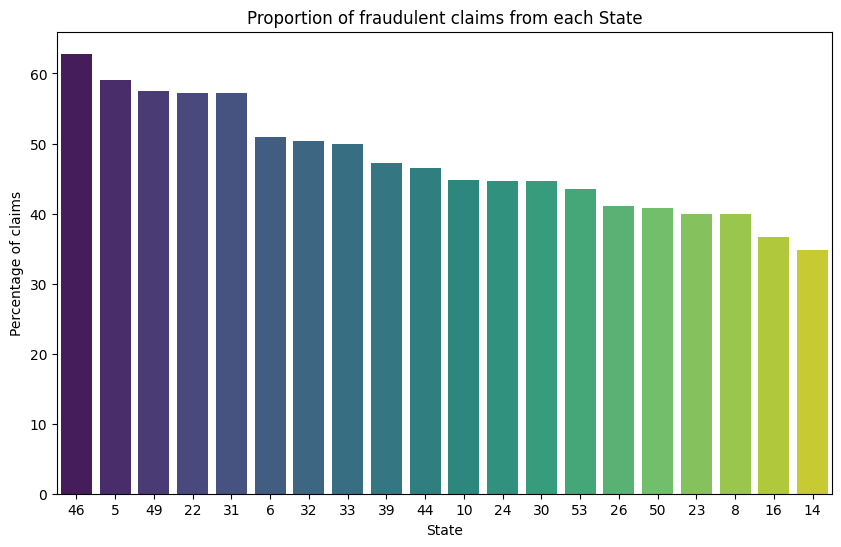

In [162]:
# Proportion of fraudulent claims in each State - top 20

res = df.groupby(['State', 'PotentialFraud']).ClaimID.count().reset_index()
res['Proportion'] = res.groupby('State')['ClaimID'].transform(lambda x: 100 * x / x.sum())

# Proportion of fraudulent claims from each state
res_fraud = res[res['PotentialFraud'] == 1].sort_values(by=['Proportion'], ascending=False)
top20 = res_fraud[:20]

colors = sns.color_palette("viridis", n_colors=len(top20))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='State', y='Proportion', order=top20.sort_values(by='Proportion', ascending=False).State.values, data=top20, palette=colors)
plt.title('Proportion of fraudulent claims from each State')
plt.xlabel('State')
plt.ylabel('Percentage of claims')
plt.show()


only 5 states have proportion of fraudulent claims more that 50%

/var/folders/sb/f47mxfbj0wzd8zt7cp8zbtnr0000gn/T/ipykernel_8323/1827938244.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='County', y='Proportion', order=top20.sort_values(by='Proportion', ascending=False).County.values, data=top20, palette=colors)


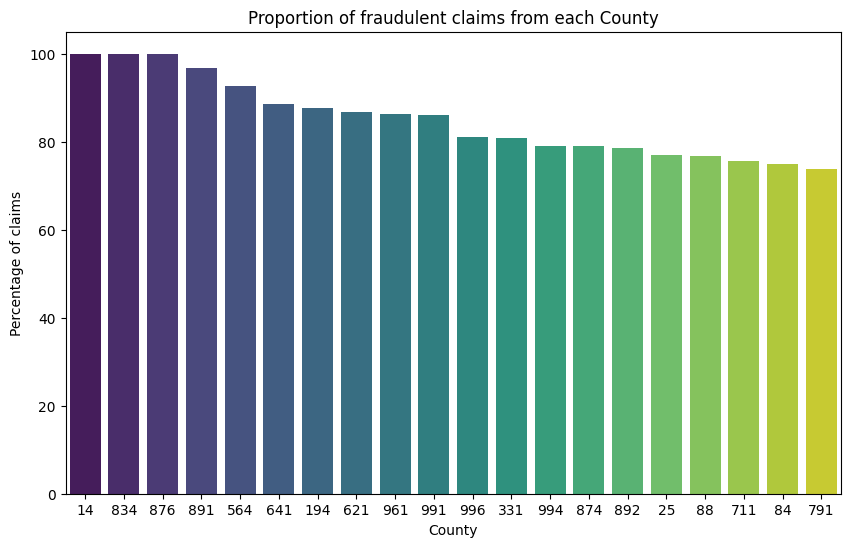

In [163]:
# Proportion of fraudulent claims in each County - top 20

res = df.groupby(['County', 'PotentialFraud']).ClaimID.count().reset_index()
res['Proportion'] = res.groupby('County')['ClaimID'].transform(lambda x: 100 * x / x.sum())

# Proportion of fraudulent claims from each County
res_fraud = res[res['PotentialFraud'] == 1].sort_values(by=['Proportion'], ascending=False)
top20 = res_fraud[:20]

colors = sns.color_palette("viridis", n_colors=len(top20))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='County', y='Proportion', order=top20.sort_values(by='Proportion', ascending=False).County.values, data=top20, palette=colors)
plt.title('Proportion of fraudulent claims from each County')
plt.xlabel('County')
plt.ylabel('Percentage of claims')
plt.show()


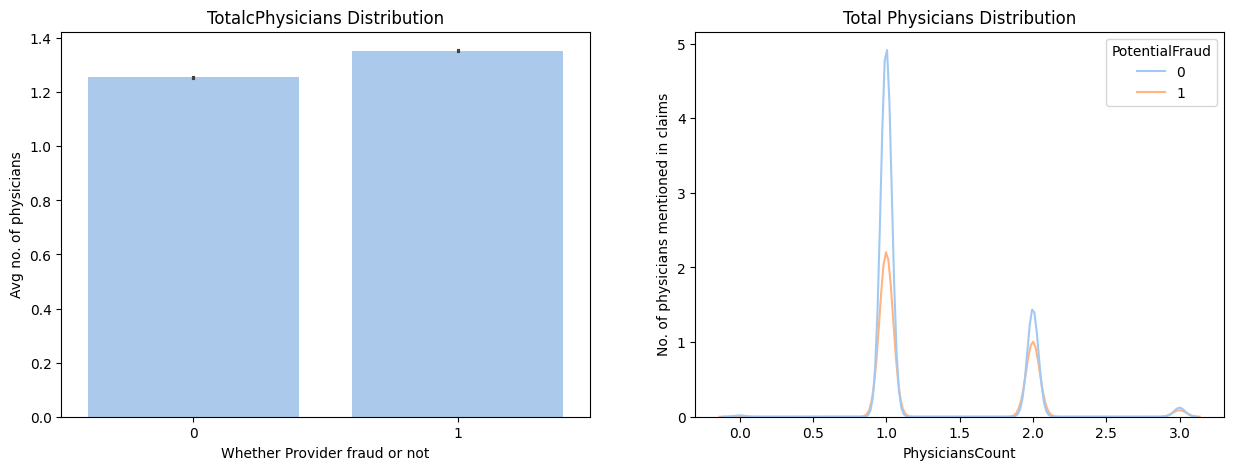

In [167]:
# Total Physicians for fraudulent and genuine providers

f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='PhysiciansCount', data=df)
plt.title("TotalcPhysicians Distribution")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of physicians")
plt.subplot(1,2,2)
sns.kdeplot(x='PhysiciansCount', hue='PotentialFraud', data=df)
plt.title("Total Physicians Distribution")
plt.ylabel("No. of physicians mentioned in claims")
plt.show()

### Time Series Data Analysis 

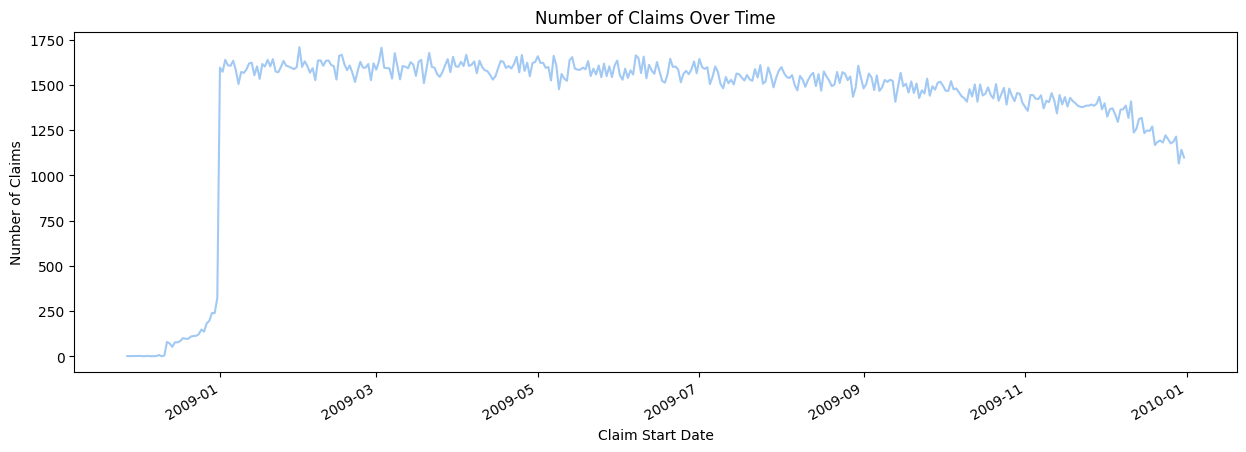

In [168]:
# Time Series Data Analysis 

# Time series analysis of the number of claims over time

# number of claims over time
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])

# number of claims over time
claims_over_time = df.groupby('ClaimStartDt').ClaimID.count()

plt.figure(figsize=(15, 5))
claims_over_time.plot()
plt.title('Number of Claims Over Time')
plt.xlabel('Claim Start Date')
plt.ylabel('Number of Claims')
plt.show()


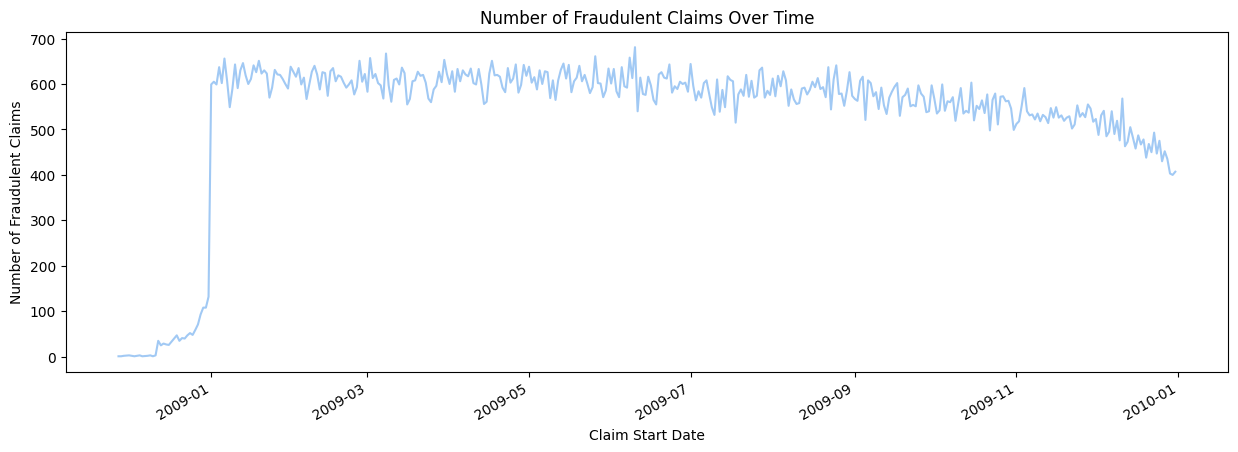

In [169]:
# number of fraudulent claims over time
fraudulent_claims_over_time = df[df['PotentialFraud'] == 1].groupby('ClaimStartDt').ClaimID.count()

plt.figure(figsize=(15, 5))
fraudulent_claims_over_time.plot()
plt.title('Number of Fraudulent Claims Over Time')
plt.xlabel('Claim Start Date')
plt.ylabel('Number of Fraudulent Claims')
plt.show()

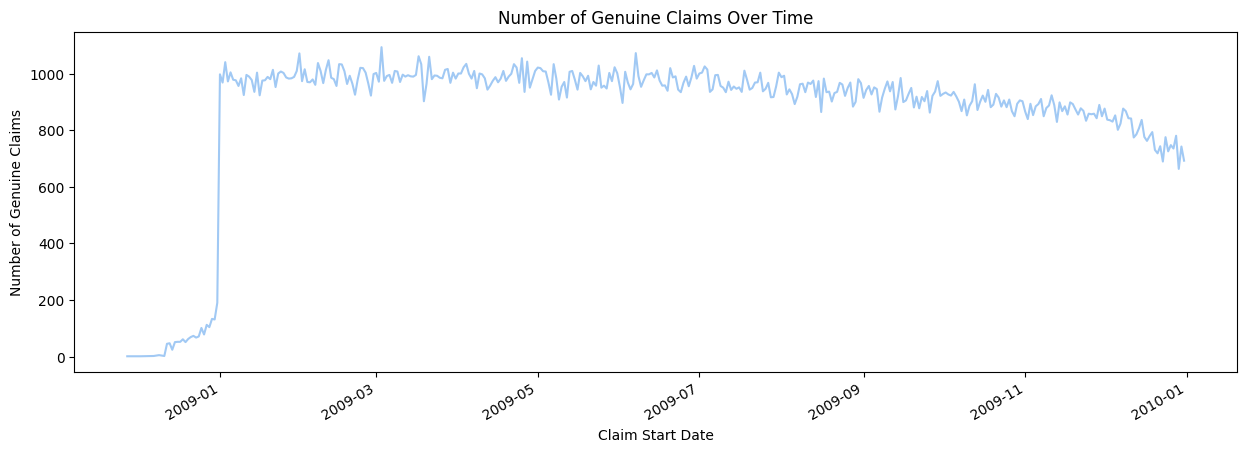

In [170]:
# number of genuine claims over time
genuine_claims_over_time = df[df['PotentialFraud'] == 0].groupby('ClaimStartDt').ClaimID.count()

plt.figure(figsize=(15, 5))
genuine_claims_over_time.plot()
plt.title('Number of Genuine Claims Over Time')
plt.xlabel('Claim Start Date')
plt.ylabel('Number of Genuine Claims')
plt.show()

### Correlation Matrix

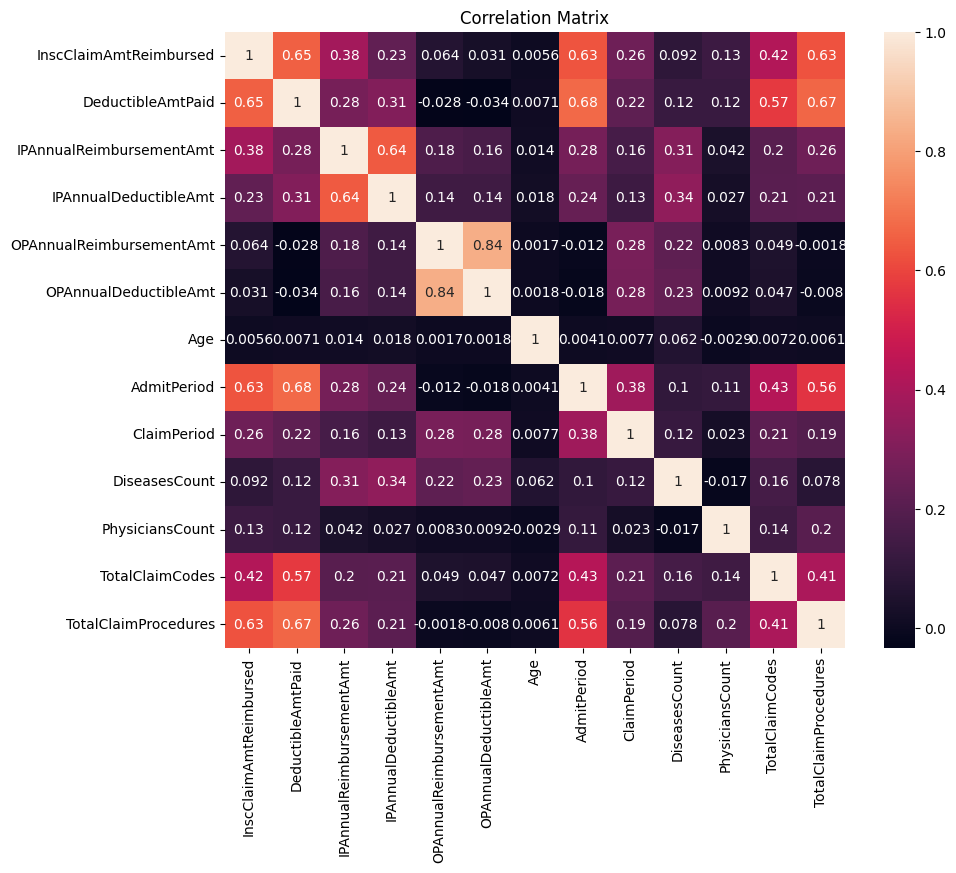

In [181]:
# Correlation Matrix

# correlation matrix considering only numerical columns
correlation_matrix = df[numerical_columns + num_new_feat].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


# Outlier detection & handling

In [184]:
import math

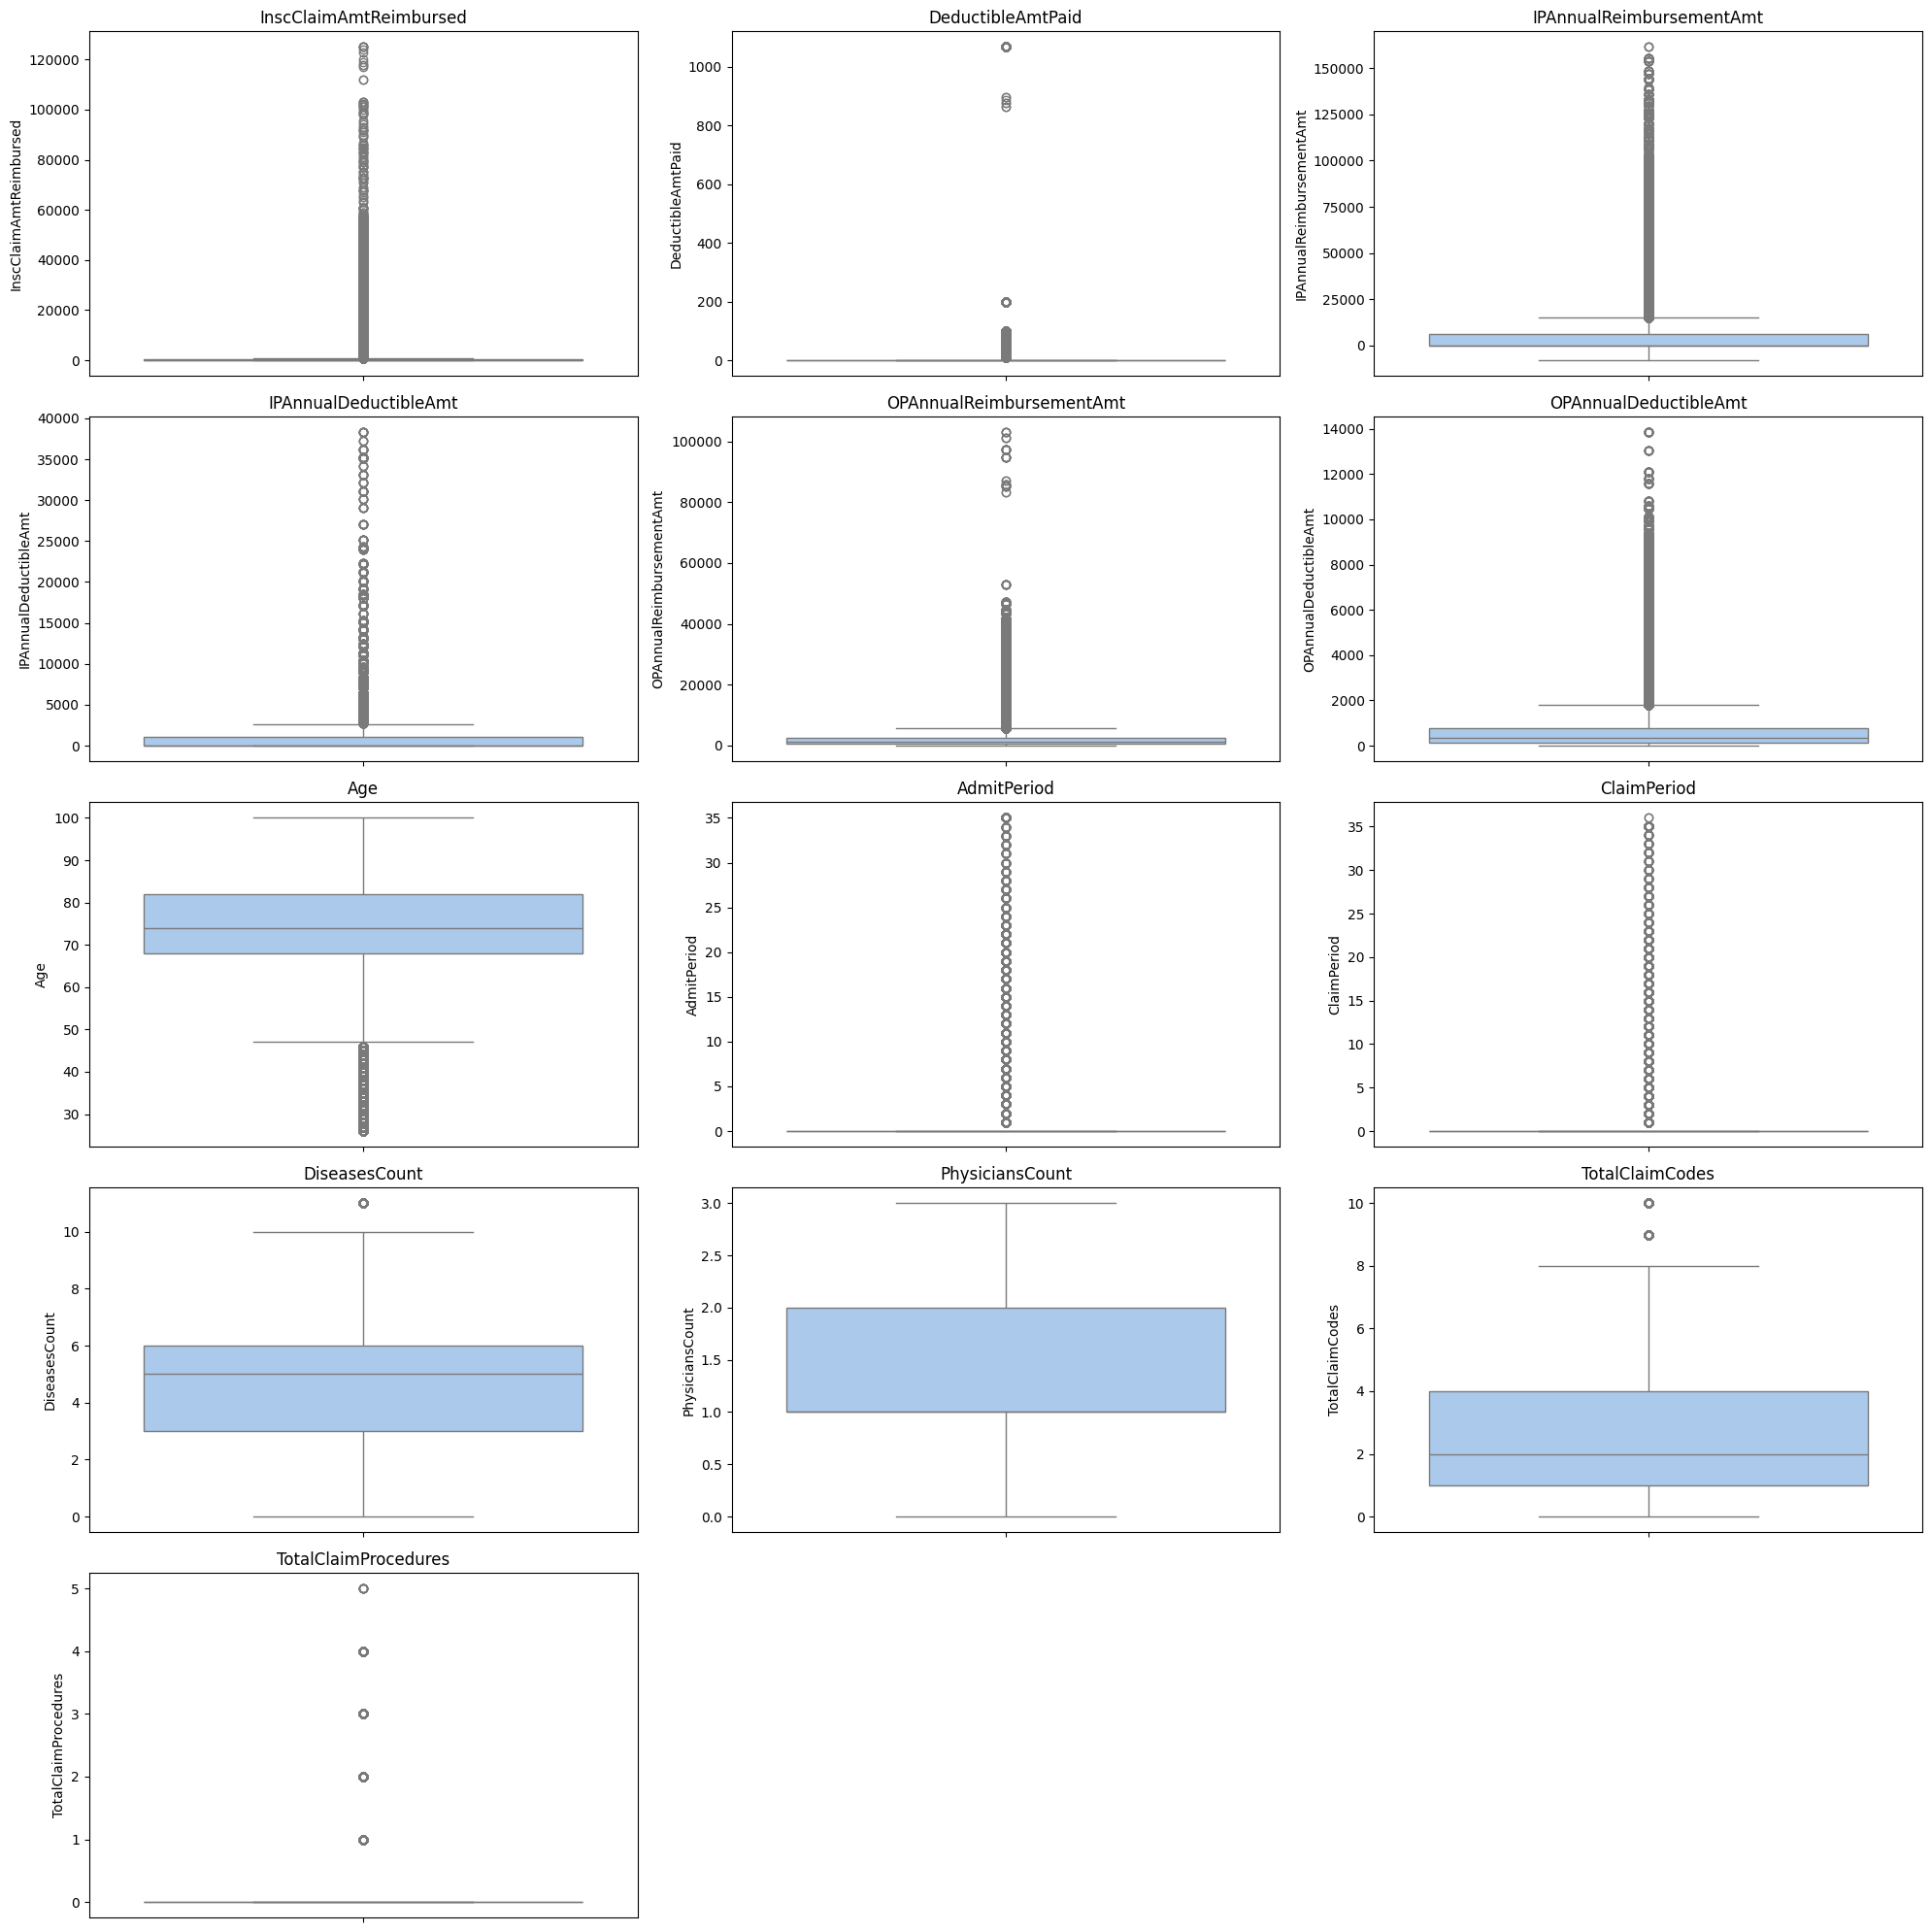

In [186]:
# outlier detection

# boxplot for numerical columns
all_numerical_columns = numerical_columns + num_new_feat
num_vars = len(all_numerical_columns)

# Calculate the number of rows and columns for subplots
num_rows = math.ceil(num_vars / 3)
num_cols = min(num_vars, 3)

plt.figure(figsize=(20, 20))

for i, col in enumerate(all_numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### using Z-score

In [190]:
z_scores = np.abs((df[all_numerical_columns] - df[all_numerical_columns].mean()) / df[all_numerical_columns].std())
outliers_numerical = (z_scores > 3).any(axis=1)

# number of outliers
outliers_numerical.sum()


100114

In [192]:
# get the outliers for each column
outliers = df[outliers_numerical]
outliers


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,66,6.0,6,4,7,1,9,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,96,12.0,12,4,5,3,9,2
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,0,87,18.0,18,1,2,1,9,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,0,79,4.0,4,4,6,3,7,1
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,1,0,84,4.0,4,4,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558164,BENE133037,CLM418724,2009-06-16,2009-06-16,PRV54579,90,PHY336181,NaN,NaN,NaT,...,0,0,30,0.0,0,4,2,1,1,0
558174,BENE136143,CLM280989,2009-04-02,2009-04-04,PRV53924,0,PHY386218,PHY425241,PHY351378,NaT,...,0,0,45,0.0,2,4,3,3,5,0
558183,BENE156459,CLM361406,2009-05-15,2009-05-29,PRV57609,2100,PHY361194,NaN,NaN,NaT,...,0,0,77,0.0,14,4,5,1,4,0
558195,BENE146239,CLM515949,2009-08-09,2009-08-29,PRV54046,0,PHY399142,NaN,PHY424251,NaT,...,0,0,77,0.0,20,4,5,2,1,0


In [194]:
# check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0] * 100
missing_values

AttendingPhysician         0.270149
OperatingPhysician        79.497538
OtherPhysician            64.218548
AdmissionDt               92.749337
ClmAdmitDiagnosisCode     73.863109
DischargeDt               92.749337
DiagnosisGroupCode        92.749337
ClmDiagnosisCode_1         1.872589
ClmDiagnosisCode_2        35.041588
ClmDiagnosisCode_3        56.458221
ClmDiagnosisCode_4        70.524407
ClmDiagnosisCode_5        79.949517
ClmDiagnosisCode_6        84.881702
ClmDiagnosisCode_7        88.144805
ClmDiagnosisCode_8        90.425843
ClmDiagnosisCode_9        92.509105
ClmDiagnosisCode_10       99.102490
ClmProcedureCode_1        95.824160
ClmProcedureCode_2        99.016501
ClmProcedureCode_3        99.826410
ClmProcedureCode_4        99.978861
ClmProcedureCode_5        99.998388
ClmProcedureCode_6       100.000000
dtype: float64

In [198]:
df.shape

(558211, 64)

In [195]:
df2 = df.copy()

### Remove Unnecessary Data Columns

In [196]:
# remove all these columns with missing values - we have created required features from these columns

# remove all variables in missing_values
df2 = df2.drop(missing_values.index, axis=1)

In [197]:
df2.shape

(558211, 41)

In [199]:
df.isna().sum()

BeneID                  0
ClaimID                 0
ClaimStartDt            0
ClaimEndDt              0
Provider                0
                       ..
Physician_Same          0
DiseasesCount           0
PhysiciansCount         0
TotalClaimCodes         0
TotalClaimProcedures    0
Length: 64, dtype: int64

In [200]:
# df2.to_csv('processed/2_cleaned_data.csv', index=False)

In [201]:
df2.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'isDead', 'Age', 'AdmitPeriod', 'ClaimPeriod', 'Physician_Same',
       'DiseasesCount', 'PhysiciansCount', 'TotalClaimCodes',
       'TotalClaimProcedures'],
      dtype='object')

In [203]:
# keep only the required columns (removing identifiers and date columns)
df2 = df2.drop(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'DOB', 'DOD'], axis=1)

In [204]:
df2.shape

(558211, 34)

In [205]:
df2.isna().sum()

InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
PotentialFraud                     0
isDead                             0
Age                                0
A

### Data Normalization

In [206]:
# Data Normalization

from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
df2[all_numerical_columns] = scaler.fit_transform(df2[all_numerical_columns])

df2.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PotentialFraud,isDead,Age,AdmitPeriod,ClaimPeriod,Physician_Same,DiseasesCount,PhysiciansCount,TotalClaimCodes,TotalClaimProcedures
0,6.542662,3.614518,1,1,0,39,230,12,12,1,...,1,0,-0.559101,2.645553,0.870964,4,1.072497,-0.579855,2.448874,-0.190910
1,-0.247810,-0.285942,1,1,0,39,310,12,12,1,...,1,0,0.286303,-0.194426,-0.352283,4,-0.213787,1.399303,2.448874,-0.190910
2,4.710935,3.614518,2,1,0,39,230,12,12,1,...,1,0,1.746548,5.485532,2.094211,4,0.214974,3.378460,2.448874,6.938348
3,4.187585,3.614518,1,1,0,39,600,12,12,0,...,1,0,1.054853,8.325512,3.317457,1,-1.071310,-0.579855,2.448874,3.373719
4,3.140884,3.614518,2,1,0,39,280,12,12,0,...,1,0,0.440013,1.698893,0.463215,4,0.643736,3.378460,1.631441,3.373719


In [207]:
df2.to_csv('processed/3_scaled_data.csv', index=False)